## Visualization examples

Examples taken from the World Happiness Report via Kaggle.  Note:  billed as "Suicide" data which is sort of the converse of happiness.

In [131]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [8, 8]

pd.set_option("display.max_rows", 9)

In [112]:
# stub for world happiness report... (SUICIDED DATA SET)
DATAPATH = '/Users/ergonyc/Projects/Insight/Data'
DATA_DIR = DATAPATH + '/world-happiness-report'

#YEAR015_FILE = os.path.join(DATA_DIR, '2015.csv')
#YEAR016_FILE = os.path.join(DATA_DIR, '2016.csv')
YEAR017_FILE = os.path.join(DATA_DIR, '2017.csv') # lets just look at 2017 for now


Lets start with just 2017 data to start wiith and explore the dataset.  Second step will be to check on how similar the three years data fields are.  

In [113]:
# Load suicide data.
year17 = pd.read_csv(YEAR017_FILE, sep=',')

year17.head()
#suicides = pd.concat([year15, year16, year17])

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [114]:
year17.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [115]:
list(year17.columns)


['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

## questions

What other measures correlate with Happiness.  Can we see a clustering of "top" and "bottom" happiness Countries in the other measures?

In [133]:
topn = 25
top_countries = year17['Country'][:topn]
bottom_countries = year17['Country'][-topn:]
top_countries.head(10)

130           Ghana
131         Ukraine
132          Uganda
133    Burkina Faso
           ...     
136            Chad
137        Zimbabwe
138         Lesotho
139          Angola
Name: Country, Length: 10, dtype: object

In [134]:
bottom_countries.head(10)

130           Ghana
131         Ukraine
132          Uganda
133    Burkina Faso
           ...     
136            Chad
137        Zimbabwe
138         Lesotho
139          Angola
Name: Country, Length: 10, dtype: object

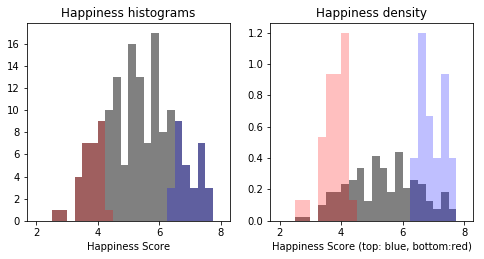

In [117]:

# Plot them as a histogram.
plt.subplot(221)
plt.hist(year17['Happiness.Score'], density=False, color='grey', bins=np.linspace(2.0, 8.0, 25), alpha=1.0)
plt.hist(year17['Happiness.Score'][:topn], density=False, color='blue', bins=np.linspace(2.0, 8.0, 25), alpha=.25)
plt.hist(year17['Happiness.Score'][-topn:], density=False, color='red', bins=np.linspace(2.0, 8.0, 25), alpha=.25)
plt.title('Happiness histograms')
plt.xlabel('Happiness Score')

plt.subplot(222)
plt.hist(year17['Happiness.Score'], density=True, color='grey', bins=np.linspace(2.0, 8.0, 25), alpha=1.0)
plt.hist(year17['Happiness.Score'][:topn], density=True, color='blue', bins=np.linspace(2.0, 8.0, 25), alpha=.25)
plt.hist(year17['Happiness.Score'][-topn:], density=True, color='red', bins=np.linspace(2.0, 8.0, 25), alpha=.25)
plt.title('Happiness density')
plt.xlabel('Happiness Score (top: blue, bottom:red)')

plt.show()



Clearly, we can compare the distributions of "top" and "Bottom" for Happiness.   

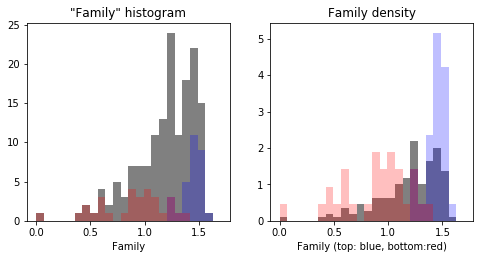

In [118]:
# Plot them as a histogram.
#plt.hist(year17['Family'], density=False) 
plt.subplot(221)
plt.hist(year17['Family'], density=False, color='grey', bins=np.linspace(0.0, 1.7, 25), alpha=1.0) 
plt.hist(year17['Family'][:topn], density=False, color='blue', bins=np.linspace(0.0, 1.7, 25), alpha=.25) 
plt.hist(year17['Family'][-topn:], density=False, color='red', bins=np.linspace(0.0, 1.7, 25), alpha=.25) 
plt.title('"Family" histogram')
plt.xlabel('Family')

plt.subplot(222)
plt.hist(year17['Family'], density=True, color='grey', bins=np.linspace(0.0, 1.7, 25), alpha=1.0)
plt.hist(year17['Family'][:topn], density=True, color='blue', bins=np.linspace(0.0, 1.7, 25), alpha=.25)
plt.hist(year17['Family'][-topn:], density=True, color='red', bins=np.linspace(0.0, 1.7, 25), alpha=.25)
plt.title('Family density')
plt.xlabel('Family (top: blue, bottom:red)')
plt.show()

But what do the other measures look like when we just look at Top and Bottom Happiness countries? 

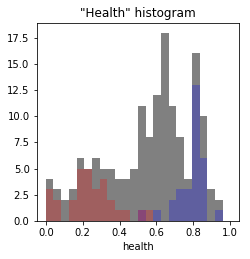

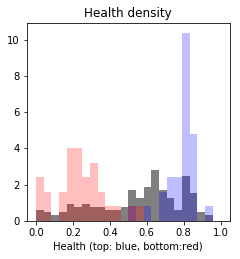

In [119]:
# Plot them as a histogram.
#plt.hist(year17['Family'], density=False) 
plt.subplot(221)
plt.hist(year17['Health..Life.Expectancy.'], density=False, color='grey', bins=np.linspace(0.0, 1.0, 25), alpha=1.0) 
plt.hist(year17['Health..Life.Expectancy.'][:topn], density=False, color='blue', bins=np.linspace(0.0, 1.0, 25), alpha=.25) 
plt.hist(year17['Health..Life.Expectancy.'][-topn:], density=False, color='red', bins=np.linspace(0.0, 1.0, 25), alpha=.25) 
plt.title('"Health" histogram')
plt.xlabel('health')
plt.subplot(222)
plt.hist(year17['Health..Life.Expectancy.'], density=True, color='grey', bins=np.linspace(0., 1., 25), alpha=1.0)
plt.hist(year17['Health..Life.Expectancy.'][:topn], density=True, color='blue', bins=np.linspace(0., 1., 25), alpha=.25)
plt.hist(year17['Health..Life.Expectancy.'][-topn:], density=True, color='red', bins=np.linspace(0., 1., 25), alpha=.25)
plt.title('Health density')
plt.xlabel('Health (top: blue, bottom:red)')


plt.show()

Clearly, Health is much better in happier countries?  Possibly, Health _causes_ people to be happy?

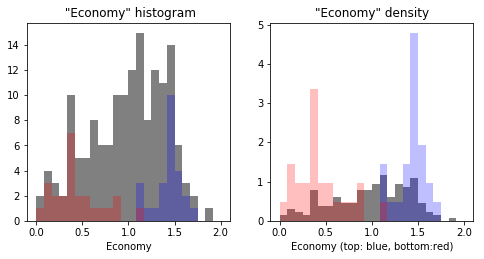

In [135]:
# Plot them as a histogram.
#plt.hist(year17['Family'], density=False) 
plt.subplot(221)
plt.hist(year17['Economy..GDP.per.Capita.'], density=False, color='grey', bins=np.linspace(0, 2.0, 25), alpha=1.0) 
plt.hist(year17['Economy..GDP.per.Capita.'][:topn], density=False, color='blue', bins=np.linspace(0.0, 2.0, 25), alpha=.25) 
plt.hist(year17['Economy..GDP.per.Capita.'][-topn:], density=False, color='red', bins=np.linspace(0.0, 2.0, 25), alpha=.25) 
plt.title(' "Economy" histogram')
plt.xlabel('Economy')

plt.subplot(222)
plt.hist(year17['Economy..GDP.per.Capita.'], density=True, color='grey', bins=np.linspace(0, 2.0, 25), alpha=1.0) 
plt.hist(year17['Economy..GDP.per.Capita.'][:topn], density=True, color='blue', bins=np.linspace(0.0, 2.0, 25), alpha=.25) 
plt.hist(year17['Economy..GDP.per.Capita.'][-topn:], density=True, color='red', bins=np.linspace(0.0, 2.0, 25), alpha=.25) 
plt.title('"Economy" density')
plt.xlabel('Economy (top: blue, bottom:red)')
plt.show()


Likewise, unhappy countries tend to have a poor economy, and rich economies are found in happy countries.  So health and wealth are emblematic of happy countries.


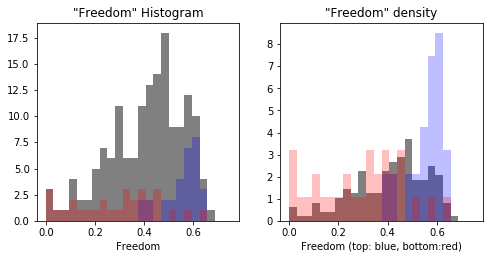

In [121]:
plt.subplot(221)
plt.hist(year17['Freedom'], density=False, color='grey', bins=np.linspace(0,0.75, 25), alpha=1.0) 
plt.hist(year17['Freedom'][:topn], density=False, color='blue', bins=np.linspace(0.0, .75, 25), alpha=.25) 
plt.hist(year17['Freedom'][-topn:], density=False, color='red', bins=np.linspace(0.0, .75, 25), alpha=.25) 
plt.title('"Freedom" Histogram')
plt.xlabel('Freedom')
plt.subplot(222)
plt.hist(year17['Freedom'], density=True, color='grey', bins=np.linspace(0,0.75, 25), alpha=1.0) 
plt.hist(year17['Freedom'][:topn], density=True, color='blue', bins=np.linspace(0.0, .75, 25), alpha=.25) 
plt.hist(year17['Freedom'][-topn:], density=True, color='red', bins=np.linspace(0.0, .75, 25), alpha=.25) 
plt.title('"Freedom" density')
plt.xlabel('Freedom (top: blue, bottom:red)')
plt.show()


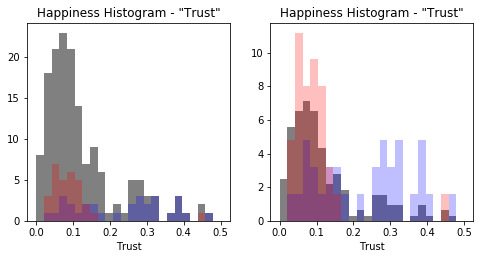

In [122]:
plt.subplot(221)
plt.hist(year17['Trust..Government.Corruption.'], density=False, color='grey', bins=np.linspace(0,0.5, 25), alpha=1.0) 
plt.hist(year17['Trust..Government.Corruption.'][:topn], density=False, color='blue', bins=np.linspace(0.0, .5, 25), alpha=.25) 
plt.hist(year17['Trust..Government.Corruption.'][-topn:], density=False, color='red', bins=np.linspace(0.0, .5, 25), alpha=.25) 
plt.title('Happiness Histogram - "Trust"')
plt.xlabel('Trust')

plt.subplot(222)
plt.hist(year17['Trust..Government.Corruption.'], density=True, color='grey', bins=np.linspace(0,0.5, 25), alpha=1.0) 
plt.hist(year17['Trust..Government.Corruption.'][:topn], density=True, color='blue', bins=np.linspace(0.0, .5, 25), alpha=.25) 
plt.hist(year17['Trust..Government.Corruption.'][-topn:], density=True, color='red', bins=np.linspace(0.0, .5, 25), alpha=.25) 
plt.title('Happiness Histogram - "Trust"')
plt.xlabel('Trust')
plt.show()

The same is true of social TRUST, but not so cleanly divided among most happy and least happy.  Probably this is due to the non-normal distribuiton of Trust. 


Looking at scatter plots for all countries we see that Happiness is highly correlated with Health Freedom and Family, which are also well correlated with themselves.


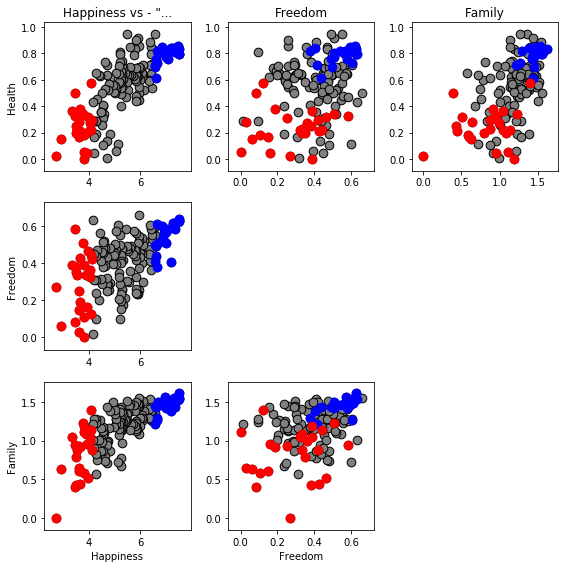

In [136]:

# Plot them as a histogram.
#plt.hist(year17['Family'], density=False) 
plt.subplot(331)
plt.scatter(year17['Happiness.Score'],year17['Health..Life.Expectancy.'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Happiness.Score'][:topn],year17['Health..Life.Expectancy.'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Happiness.Score'][-topn:],year17['Health..Life.Expectancy.'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
plt.title('Happiness vs - "...')
plt.ylabel('Health')
#plt.xlabel('Happiness')
# 
plt.subplot(334)
plt.scatter(year17['Happiness.Score'],year17['Freedom'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Happiness.Score'][:topn],year17['Freedom'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Happiness.Score'][-topn:],year17['Freedom'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
#plt.title('Happiness vs- "Freedom"')
plt.ylabel('Freedom')
#plt.xlabel('Happiness')
plt.subplot(337)
plt.scatter(year17['Happiness.Score'],year17['Family'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Happiness.Score'][:topn],year17['Family'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Happiness.Score'][-topn:],year17['Family'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
#plt.title('Happiness vs- "Freedom"')
plt.ylabel('Family')
plt.xlabel('Happiness')


plt.subplot(332)
plt.scatter(year17['Freedom'],year17['Health..Life.Expectancy.'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Freedom'][:topn],year17['Health..Life.Expectancy.'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Freedom'][-topn:],year17['Health..Life.Expectancy.'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
plt.title("Freedom")

plt.subplot(333)
plt.scatter(year17['Family'],year17['Health..Life.Expectancy.'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Family'][:topn],year17['Health..Life.Expectancy.'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Family'][-topn:],year17['Health..Life.Expectancy.'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
plt.title("Family")


plt.subplot(338)
plt.scatter(year17['Freedom'],year17['Family'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Freedom'][:topn],year17['Family'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Freedom'][-topn:],year17['Family'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
plt.xlabel("Freedom")

plt.tight_layout()
plt.show()

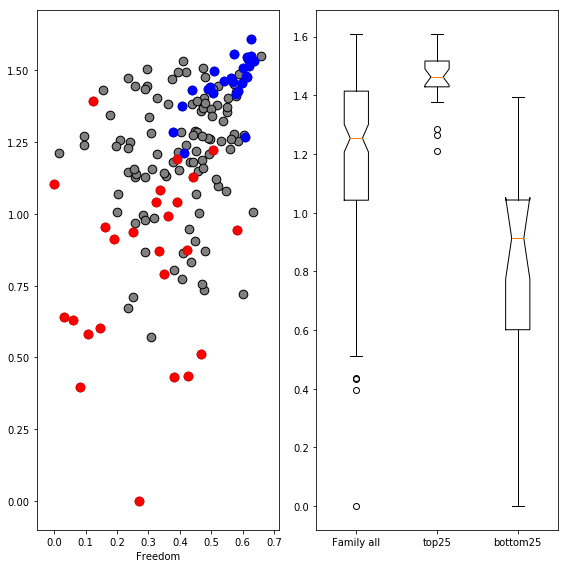

In [137]:

plt.subplot(121)
plt.scatter(year17['Freedom'],year17['Family'], 
            zorder=10, 
            s=75, 
            edgecolors='k',
            c='gray')
plt.scatter(year17['Freedom'][:topn],year17['Family'][:topn], 
            zorder=10, 
            s=75, 
            c='blue')
plt.scatter(year17['Freedom'][-topn:],year17['Family'][-topn:], 
            zorder=10, 
            s=75, 
            c='red')
plt.xlabel("Freedom")

plt.subplot(122)
data = [year17['Family'],year17['Family'][:topn],year17['Family'][-topn:]]
plt.boxplot(data, notch=True)
plt.xticks(ticks=[1,2,3],labels=['Family all','top{}'.format(topn),'bottom{}'.format(topn)])

plt.tight_layout()

plt.show()

Finally, we can drill inot the one of the measures to begin to see that Family scores are much higher in the happiest countries than in the least happy countries.
